1.Import

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)


2.Read the file

In [7]:
data = pd.read_csv('Seed_Data.csv')
data.sample(5)

,A,P,C,LK,WK,A_Coef,LKG,target
117,19.15,16.45,0.8890,6.245,3.815,3.084,6.185,1
60,11.42,12.86,0.8683,5.008,2.850,2.700,4.607,0
97,18.98,16.57,0.8687,6.449,3.552,2.144,6.453,1
119,20.03,16.90,0.8811,6.493,3.857,3.063,6.320,1
186,11.81,13.45,0.8198,5.413,2.716,4.898,5.352,2


3.Information about the data

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
A         210 non-null float64
P         210 non-null float64
C         210 non-null float64
LK        210 non-null float64
WK        210 non-null float64
A_Coef    210 non-null float64
LKG       210 non-null float64
target    210 non-null int64
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [9]:
data.describe()

,A,P,C,LK,WK,A_Coef,LKG,target
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,1.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,0.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,0.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,1.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,2.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,2.000000


4.Visualization 

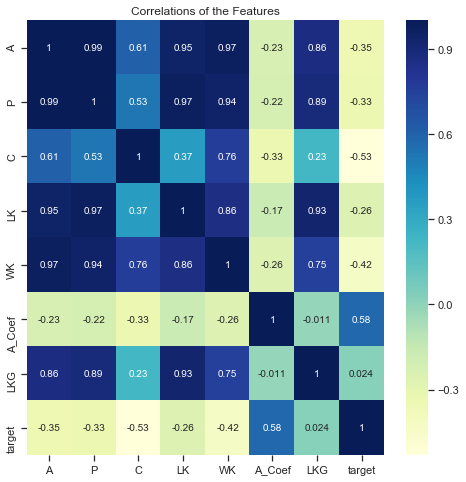

In [10]:
plt.figure(figsize=[8,8])
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.title('Correlations of the Features')
plt.show()

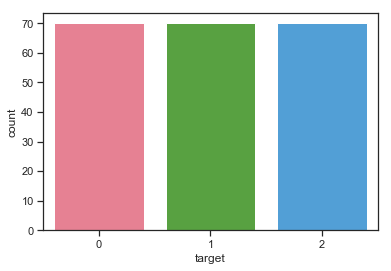

In [11]:
sns.countplot(data['target'], palette='husl')
plt.show()

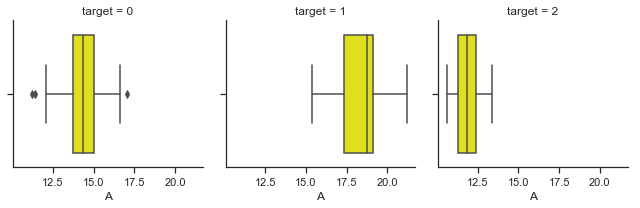

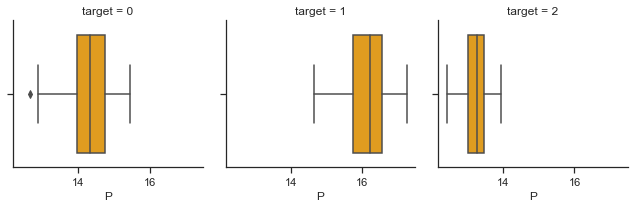

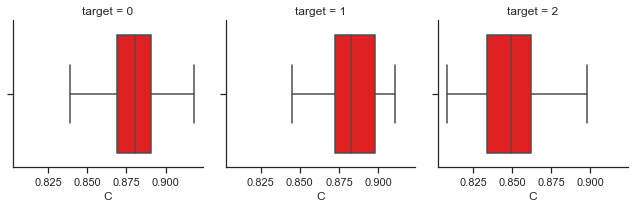

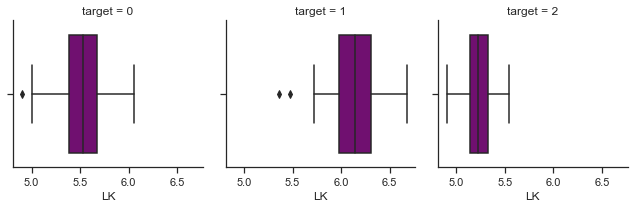

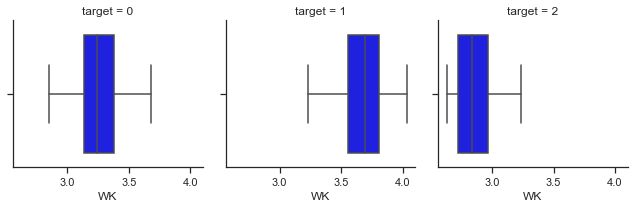

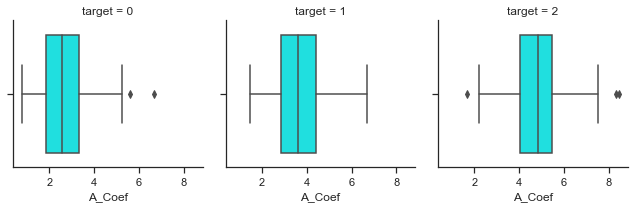

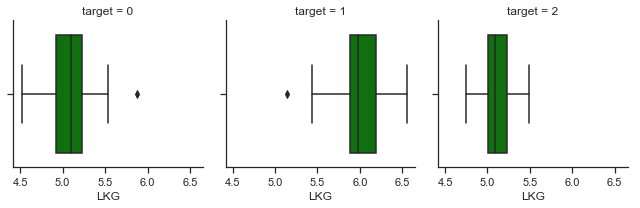

In [12]:
a = sns.FacetGrid(data, col='target')
a.map(sns.boxplot, 'A', color='yellow', order=['0', '1', '2'])

p = sns.FacetGrid(data, col='target')
p.map(sns.boxplot, 'P', color='orange', order=['0', '1', '2'])

c = sns.FacetGrid(data, col='target')
c.map(sns.boxplot, 'C', color='red', order=['0', '1', '2'])

lk = sns.FacetGrid(data, col='target')
lk.map(sns.boxplot, 'LK', color='purple', order=['0', '1', '2'])

wk = sns.FacetGrid(data, col='target')
wk.map(sns.boxplot, 'WK', color='blue', order=['0', '1', '2'])

acoef = sns.FacetGrid(data, col='target')
acoef.map(sns.boxplot, 'A_Coef', color='cyan', order=['0', '1', '2'])

lkg = sns.FacetGrid(data, col='target')
lkg.map(sns.boxplot, 'LKG', color='green', order=['0', '1', '2'])

5.Split to train and test data

In [13]:
# Split-out validation dataset 80 train , 20 test
array = data.values
x = array[:,0:7]
y = array[:,7]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

6.KNN applied

In [14]:
from sklearn.neighbors import KNeighborsClassifier
import math
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print(round(float(sum(pred==y_test)/len(y_test)),2))##accuracy

0.9


7.Metrics

In [17]:
from sklearn.metrics import accuracy_score
print('Test Accuracy Score:', accuracy_score(y_test,pred))

Test Accuracy Score: 0.9047619047619048


In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.93      0.81      0.87        16
         1.0       1.00      0.92      0.96        13
         2.0       0.81      1.00      0.90        13

   micro avg       0.90      0.90      0.90        42
   macro avg       0.91      0.91      0.91        42
weighted avg       0.91      0.90      0.90        42

